# Chapter 9 - Support Vector Machines
The topics of this chapter are

- Support Vector Classifiers
- Support Vector Machines

Three packages are used in the examples of this chapter: e1071, ISLR, ROCR.

The support vector machine is used for classification. It is defined by a function that represents the boundary between two classes of observations. If the classes can be separated by a linear boundary, e.g. a line in a two-dimesional space, then the algorithm is called support vector classifier. When the observations can be separated by a linear function and are defined by more than two variables, the decision boundary is an hyperplane represented by the equation

$$\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_p X_p = 0$$


An observation belongs to one of the two regions separated by the decision boundary depending whether the value of the function for that observation is higher or lower than zero. The members of the two classes should not fall too close to the boundary and two margins are defined on each side of the two classes where no observations should be found with the decision boundary in between. Only a subset of the observations are used to define the margins. When the two classes cannot be separated by a linear functions it is possible to use polynomials or other non-linear functions. 

### 9.6.1 Support Vector Classifier
We simulate the data taking a random sample of data points in two dimensions, $X(X_1, X_2)$ to create two classes of points, in a two-dimensional space, that are not linearly separable. 

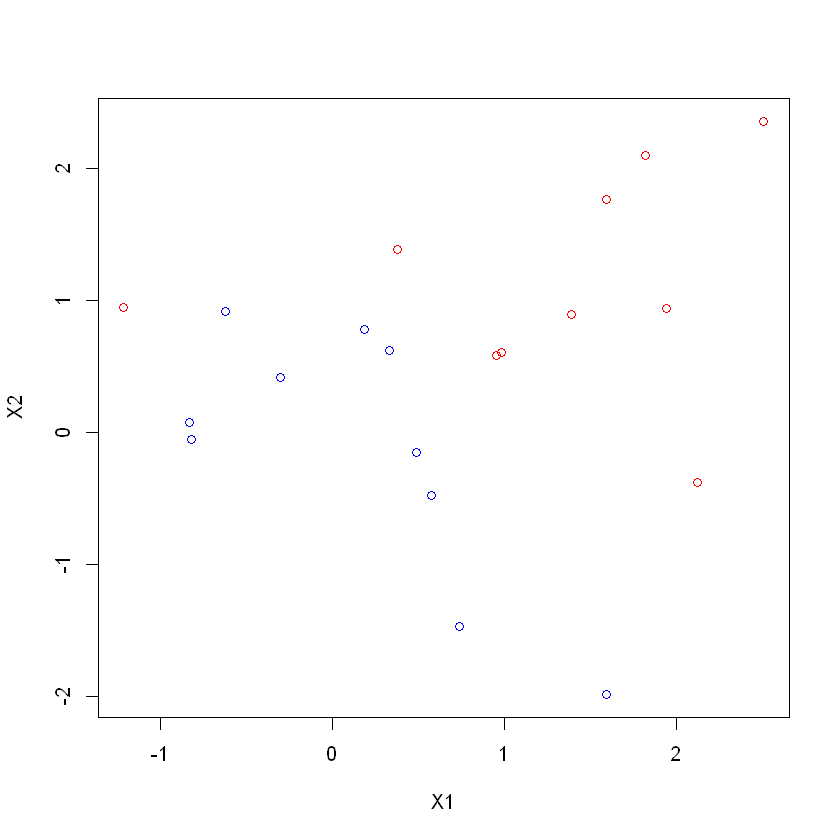

In [2]:
set.seed(1)
X <- matrix(rnorm(20 * 2), ncol = 2) # random sample matrix from a normal distribution with mean = 0 and standard deviation = 1
y <- c(rep(-1, 10), rep(1, 10)) # two classes y = -1 and y = 1
X[y == 1, ] <- X[y == 1, ] + 1 # adds 1 to data points with y = 1 to somewhat pull them apart from those with y = -1 (still, the two classes are not linearly separable)
plot(X, col = (3 - y), xlab = "X1", ylab = "X2") # plots the data points with different colors, y = 1 -> red (2), y = - 1 -> blue (4)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




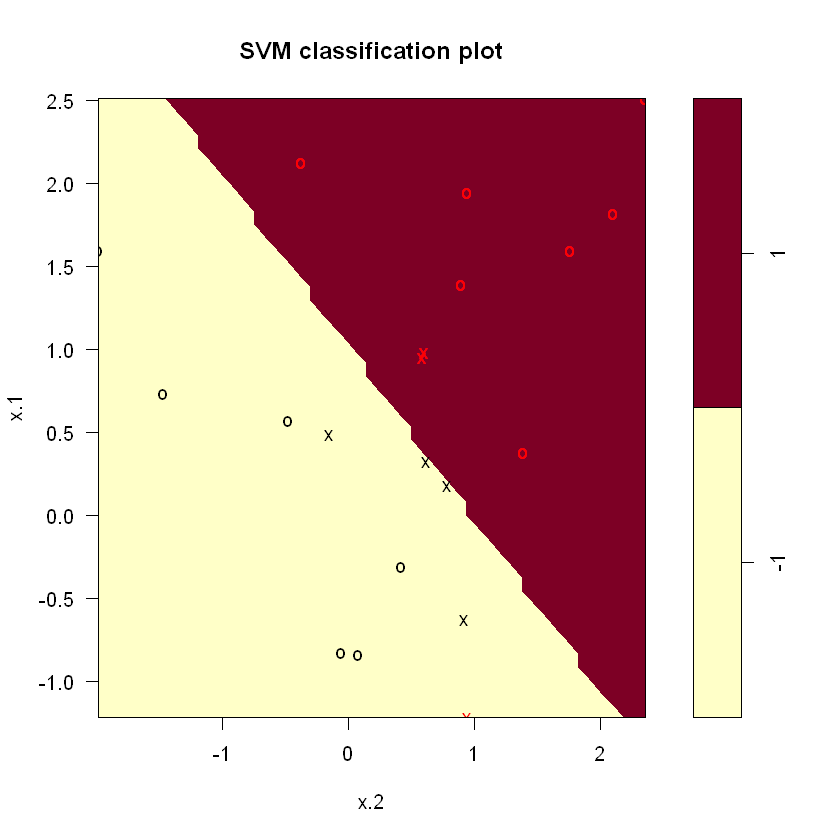

In [4]:
dat <- data.frame(x = X, y = as.factor(y)) # the response variable is encoded as a variable of (two) classes
library(e1071)
svmfit <- svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE) 
summary(svmfit)
plot(svmfit, dat)

We try now different values of the cost, the higher is the value of the cost the larger is the margin and the more data point are allowed to be between the margin and the decision boundary.

In [5]:
set.seed(1)
cost_range <- c(0.001, 0.01, 0.1, 1.5, 10, 100)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear", ranges = list(cost = cost_range))
best_model <- tune.out$best.model
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
     cost error dispersion
1   0.001  0.55  0.4377975
2   0.010  0.55  0.4377975
3   0.100  0.05  0.1581139
4   1.500  0.15  0.2415229
5  10.000  0.15  0.2415229
6 100.000  0.15  0.2415229


We can see that the lowest cross-validation error is when cost = 0.1. We will use the best model, with cost = 0.1, to make predictions. Before that we need to create a test set of observations, then we use the best model to predict the class of each observation and finally we see how many observations have been misclassified.

In [6]:
Xtest <- matrix(rnorm(20 * 2), ncol = 2) # random sample matrix from a normal distribution with mean = 0 and standard deviation = 1
ytest <- sample(c(-1, 1), size = 20, replace = TRUE) # random permutations with replacement from the set {-1, 1}
Xtest[ytest == 1, ] <- Xtest[ytest == 1, ] + 1 # adds 1 to the data points for which ytest = 1
testdat <- data.frame(x = Xtest, y = as.factor(ytest))
ypred <- predict(best_model, testdat)
t <- table(predict = ypred, truth = testdat$y)
(1 - (t[1,1] + t[2,2]) / 20) * 100 # percentage of misclassified data points

[1] 15

### 9.6.2 Support Vector Machine
We want to move beyond the linear model in order to be able to separate observations that belong to classes that are not linearly separable, in other words, classes for which the decision boundary cannot be represented as a linear function. We can use the same svm() function that we used for the linear case, we just need to set the kernel to "polynomial" or "radial". We first create a data set of observations that will belong to two classes that are not linearly separable. 

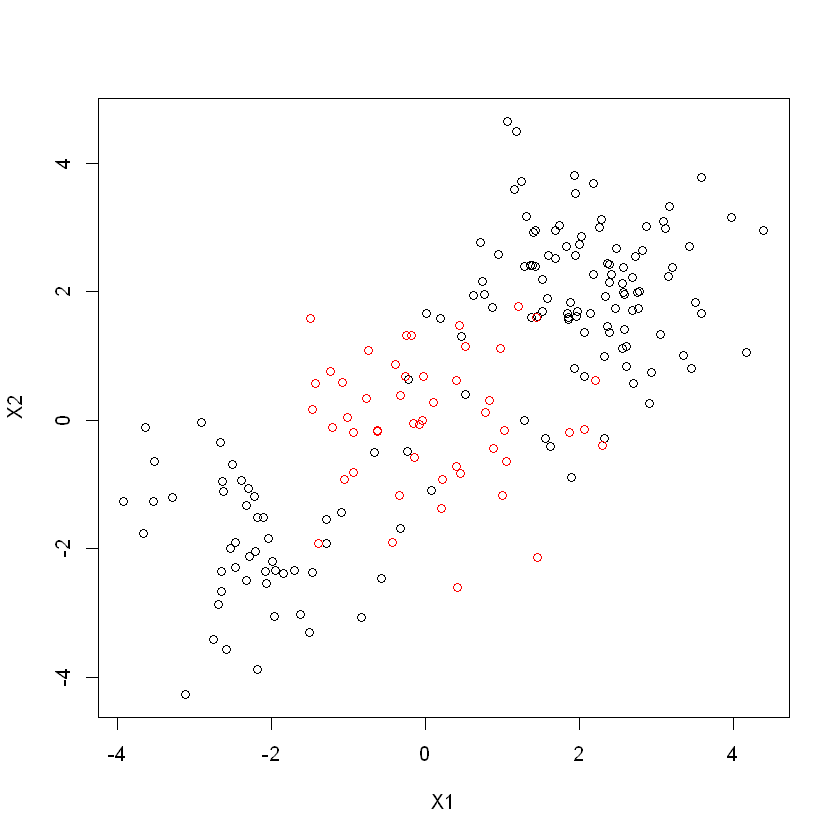

In [47]:
set.seed(1)
X <- matrix(rnorm(200 * 2), ncol = 2) # random sample matrix from a normal distribution with mean = 0 and standard deviation = 1
X[1:100, ] <- X[1:100, ] + 2
X[101:150, ] <- X[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = X, y = as.factor(y))
plot(X, col = y, xlab = "X1", ylab = "X2") # plots the data points with different colors, y = 2 -> red , y = 1 -> black

The two classes, 1 and 2 represented as black and red dots respectively, are not linearly separable. We split the observations randomly into a training set and a test set and use the training set to fit a model with the radial kernel.


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




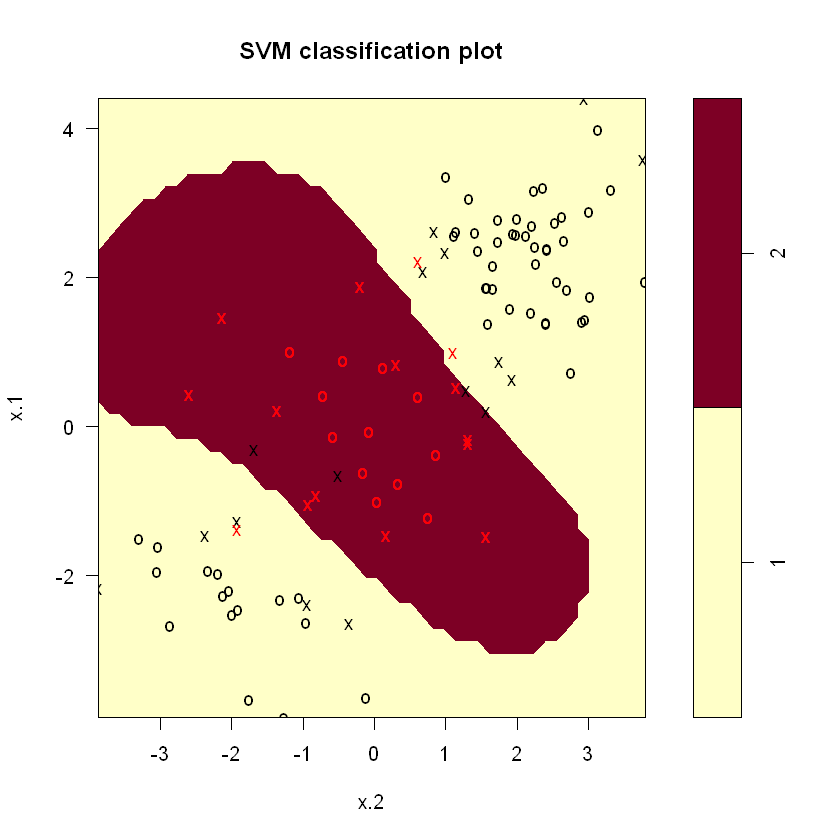

In [48]:
train <- sample(200, 100) # create a sample of 100 integers from a set that ranges from 1 to 200 (each with probability 1/200)
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, cost = 1)
summary(svmfit)
plot(svmfit, dat[train, ])

We now train different non-linear support vector machines using the radial kernel with different values of the gamma parameter and of the cost parameter. As we saw before, the higher is the value of the cost, the larger is the margin and the more data points are allowed to be between the margin and the decision boundary. The gamma parameter weights the distance of a data point from a training observation. A large value of the gama parameter decreases the relevance of observations that are far from the training data points, in other words, the kernel is more localized. In particular we try 5 values for the cost and 5 values for the gamma parameter for a total of 25 models. We use cross-validation to select the best model on the training data set.

In [49]:
set.seed(1)
cost_range <- c(0.1, 1, 10, 100, 1000)
gamma_range <- c(0.5, 1, 2, 3, 4)
tune.out <- tune(svm, y ~ ., data = dat[train, ], kernel = "radial", ranges = list(cost = cost_range, gamma = gamma_range))
best_model <- tune.out$best.model
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

We now use the best model to predict the class of observations in the test data set and compute the percentage of misclassifications.

In [71]:
Xtest <- X[-train, ]
ytest <- y[-train]
testdat <- data.frame(x = Xtest, y = as.factor(ytest))
ypred <- predict(best_model, testdat)
t <- table(predict = ypred, truth = testdat$y) # truth-prediction table 
t
(1 - (t[1,1] + t[2,2]) / 100) * 100 # percentage of misclassified data points

       truth
predict  1  2
      1 67  2
      2 10 21

[1] 12

### 9.6.3 ROC Curves

In [72]:
library(ROCR)
rocplot <- function(pred, truth, ...) {
   predob <- prediction(pred, truth)
   perf <- performance(predob, "fpr", "tpr") 
   plot(perf,...)
}

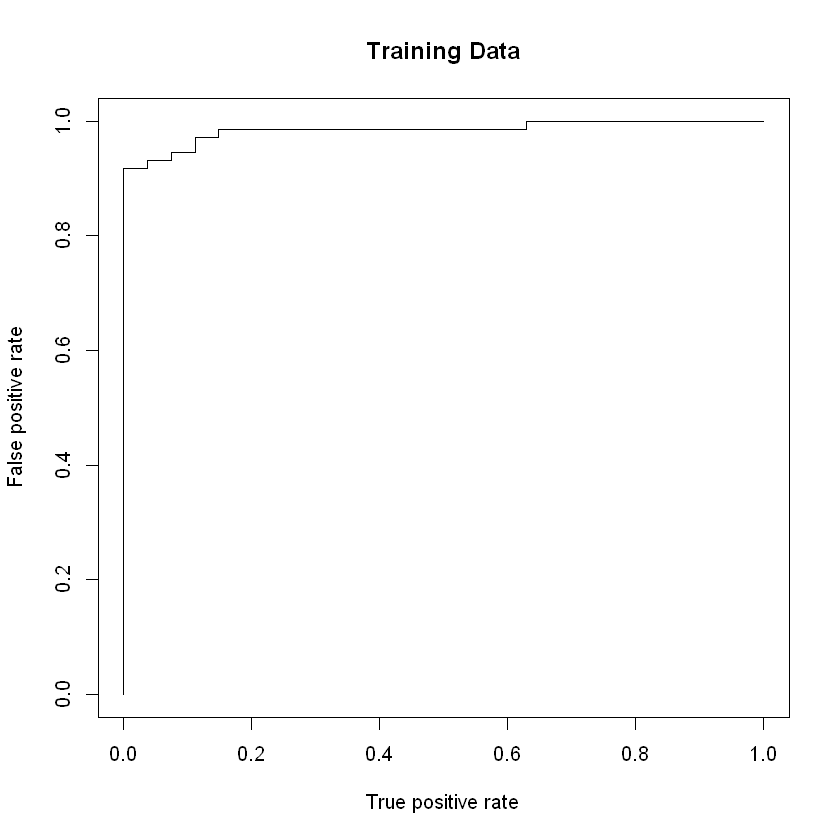

In [86]:
svmfit.opt <- svm(y ~ ., data = dat[train, ], kernel = "radial", gamma = 2, cost = 1, decision.values = TRUE)
fitted <- attributes(predict(svmfit.opt,dat[train, ], decision.values = TRUE))$decision.values
#par(mfrow = c(1,2))
rocplot(fitted, dat[train,"y"], main = "Training Data")

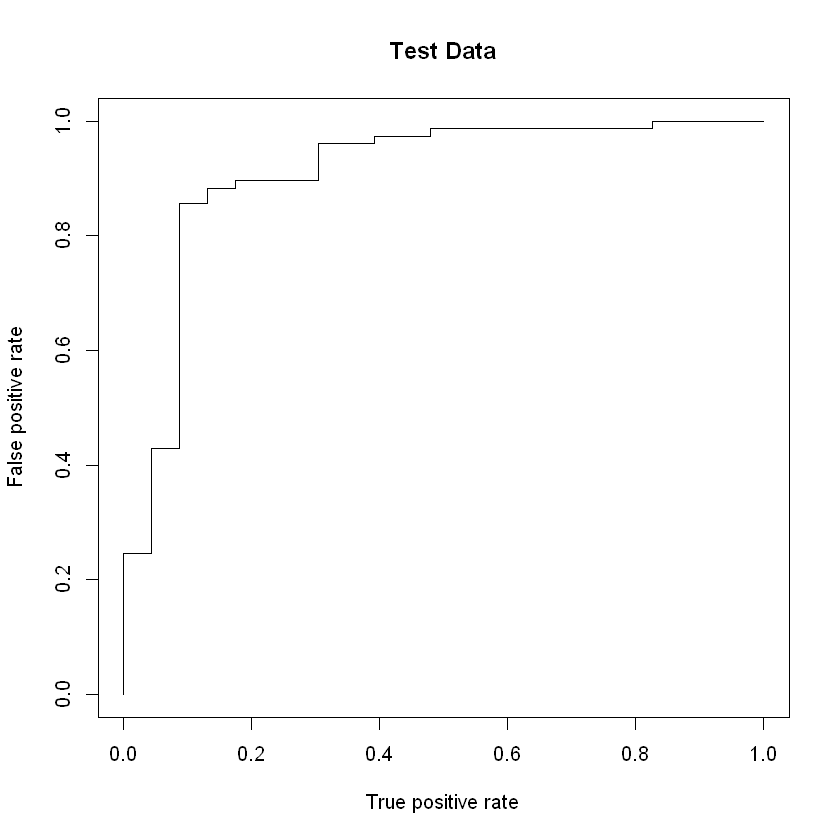

In [82]:
fitted <- attributes(predict(svmfit.opt,dat[-train, ], decision.values = TRUE))$decision.values
rocplot(fitted, dat[-train,"y"], main = "Test Data")

If we increase the value of gamma, e.g. to 50, we will see that the function will fit perfectly the training data but it will be less accurate with the test data.